In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("training_results.csv")

In [3]:
data

,easy_time,Easy,hard_time,Hard,adr_time,ADR-EASY,ADR-FULL,ADR-HARD
0,16384,0.02,16384,0.00,32768.0,0.0,0.0,0.0
1,32768,0.00,32768,0.01,655360.0,0.1,0.2,0.1
2,49152,0.02,49152,0.02,1310720.0,0.0,0.0,0.0
3,65536,0.00,65536,0.03,1966080.0,0.2,0.3,0.2
4,81920,0.00,81920,0.13,2621440.0,0.3,0.1,0.2
...,...,...,...,...,...,...,...,...
11441,187465728,0.61,187465728,0.57,NaN,NaN,NaN,NaN
11442,187482112,0.77,187482112,0.69,NaN,NaN,NaN,NaN
11443,187498496,0.59,187498496,1.17,NaN,NaN,NaN,NaN
11444,187514880,0.42,187514880,0.31,NaN,NaN,NaN,NaN


In [5]:
def smooth(x, window=3):
    x_smooth = x.rolling(window=window).mean()
    return x_smooth

In [12]:
t_vanilla = data.loc[:, "easy_time"]
easy_vanilla = data.loc[:, "Easy"]
hard_vanilla = data.loc[:, "Hard"]


t_adr = data.loc[:, "adr_time"]
adr_easy = data.loc[:, "ADR-EASY"]
adr_full = data.loc[:, "ADR-FULL"]
adr_hard = data.loc[:, "ADR-HARD"]

In [23]:
vanilla_window = 4
t_v_sm = smooth(t_vanilla, window=vanilla_window)
ez_v_sm = smooth(easy_vanilla, window=vanilla_window)
hd_v_sm = smooth(hard_vanilla, window=vanilla_window)

adr_window = 4
t_adr_sm = smooth(t_adr, window=adr_window)
ez_adr_sm = smooth(adr_easy, window=adr_window)
full_adr_sm = smooth(adr_full, window=adr_window)
hd_adr_sm = smooth(adr_hard, window=adr_window)


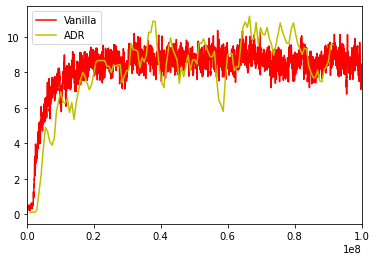

In [38]:
plt.figure()
#plt.plot(t_v_sm, ez_v_sm, color="b")
plt.plot(t_v_sm, hd_v_sm, color="r")
#plt.plot(t_adr_sm, ez_adr_sm, color="y")
#plt.plot(t_adr_sm, full_adr_sm, color="y")
plt.plot(t_adr_sm, hd_adr_sm, color="y")
plt.xlim([0, 1E8])
plt.legend(["Vanilla", "ADR"], loc="upper left")
plt.savefig("hard_compare.png")
#plt.legend(["Easy", "Hard", "ADR-Easy", "ADR-Full", "ADR-Hard"])